## Problem Statement

#### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#### - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


## Objective

### Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
        
### import pandas as pd

### Read CSV file into a DataFrame

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Loading loan data CSV file into a DataFrame
loan_df = pd.read_csv("lending_loan.csv")

# Display the DataFrame
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. DATA CLEANING

# 1.1 To check if there is any headers/footers and delete it

In [11]:
loan_df.head()
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
# checking for footers rows

loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# There is no headers or footers.

In [14]:
# No. of rows is 39717 and columns is 111

loan_df.shape

(39717, 111)

In [15]:
total_rows=len(loan_df)
total_rows

39717

In [16]:
#To check for unnecessary rows.

loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [17]:
# Since we dont require the loan_status=Current as the loan currently in progress,
# Dropping off Cureent loan_status rows

loan_df=loan_df[loan_df['loan_status']!='Current']
len(loan_df) ## total rows after dropping the rows with loan_status as 'Current'

38577

# 1.2 Delete the unnecessary columns

In [18]:
loan_df.shape # to get the shape of data set

(38577, 111)

In [19]:
# To check the columns with null values or blank values.

(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [20]:
# Deleting the columns which is having all rows values as na.

loan_df= loan_df.dropna(axis=1, how="all")
loan_df # data set after dropping the columns with null values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [21]:
# Number of columns after dropping colums with null values

loan_df.shape

(38577, 56)

In [22]:
# Deleting all the columns which have unique values in nature.

unique_columns = [column for column in loan_df if loan_df[column].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

In [23]:
# We will drop the id and url, keeping the member id as I might require it.

loan_df.drop(['id','url'],axis=1, inplace=True)

In [24]:
# Dropping columns having text/description values as they dont contribute to EDA

loan_df.drop(columns=['desc','title'], inplace=True)
loan_df.shape

(38577, 52)

In [25]:
# We will limit our analysis till Group level,thereby deleting the subgroups.

loan_df= loan_df.drop(['sub_grade'], axis=1)

In [26]:
loan_df.shape

(38577, 51)

In [27]:
# Post loan approval columns might not be required, hence will drop it.

extra_columns=['last_pymnt_amnt','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','application_type','last_pymnt_d','last_credit_pull_d',]
loan_df=loan_df.drop(extra_columns,axis=1)

In [28]:
loan_df.shape

(38577, 34)

In [29]:
# Checking columns having individual unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
revol_util                     1088
dti                            2853
annual_inc                  

In [30]:
# Deleting columns having value as 1

for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df=loan_df.drop(column, axis=1)
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,860xx,AZ,27.65,NaN,NaN,13648,83.70%,9,5863.155187,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,309xx,GA,1.00,NaN,NaN,1687,9.40%,4,1008.710000,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,606xx,IL,8.72,NaN,NaN,2956,98.50%,10,3005.666844,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,917xx,CA,20.00,35.0,NaN,5598,21%,37,12231.890000,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,852xx,AZ,11.20,NaN,NaN,7963,28.30%,12,5632.210000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,802xx,CO,11.33,0.0,0.0,7274,13.10%,40,2822.969293,NaN
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,274xx,NC,6.40,5.0,0.0,8847,26.90%,9,9913.491822,NaN
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,017xx,MA,2.30,0.0,0.0,9698,19.40%,20,5272.161128,NaN
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,208xx,MD,3.72,0.0,0.0,85607,0.70%,26,5174.198551,NaN


In [31]:
# Dropping the columns which is having more than 50% of values as null

total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 24)

In [32]:
# Deleting emp_title as its description or textual info and doesnt contribute to EDA

loan_df=loan_df.drop(['emp_title'], axis=1)

In [33]:
loan_df.shape

(38577, 23)

In [34]:

# dropping loan amount and funded amount as the final loan amount approved is funded_amnt_inv
extra_col=['loan_amnt','funded_amnt']
loan_df=loan_df.drop(extra_col,axis=1)

In [35]:
loan_df.shape

(38577, 21)

In [36]:
loan_df.columns

Index(['member_id', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'pub_rec_bankruptcies'],
      dtype='object')

# 2. Data Conversion

In [37]:
loan_df.dtypes

member_id                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
pub_rec_bankruptcies    float64
dtype: object

In [38]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [39]:
# Convert term from string to int.

def clean_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term)  # removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [40]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [41]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [42]:
# Converting int_rate from string to float.

loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)

In [43]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [44]:
loan_df.dtypes

member_id                 int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
pub_rec_bankruptcies    float64
dtype: object

In [45]:
loan_df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [46]:
# Converting 'issue_d' to data type to easily understand the date-month-year

loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [47]:
loan_df['issue_year']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month

In [48]:
loan_df

,member_id,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,zip_code,addr_state,dti,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,1296599,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,...,860xx,AZ,27.65,13648,83.70%,9,5863.155187,0.0,2011,12
1,1314167,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,309xx,GA,1.00,1687,9.40%,4,1008.710000,0.0,2011,12
2,1313524,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,...,606xx,IL,8.72,2956,98.50%,10,3005.666844,0.0,2011,12
3,1277178,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,...,917xx,CA,20.00,5598,21%,37,12231.890000,0.0,2011,12
5,1311441,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,...,852xx,AZ,11.20,7963,28.30%,12,5632.210000,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,...,802xx,CO,11.33,7274,13.10%,40,2822.969293,NaN,2007,7
39713,90607,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,...,274xx,NC,6.40,8847,26.90%,9,9913.491822,NaN,2007,7
39714,90390,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,...,017xx,MA,2.30,9698,19.40%,20,5272.161128,NaN,2007,7
39715,89243,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,...,208xx,MD,3.72,85607,0.70%,26,5174.198551,NaN,2007,7


In [49]:
loan_df.dtypes

member_id                        int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
revol_bal                        int64
revol_util                      object
total_acc                        int64
total_pymnt                    float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
dtype: object

## Removing Outlier 

<Axes: >

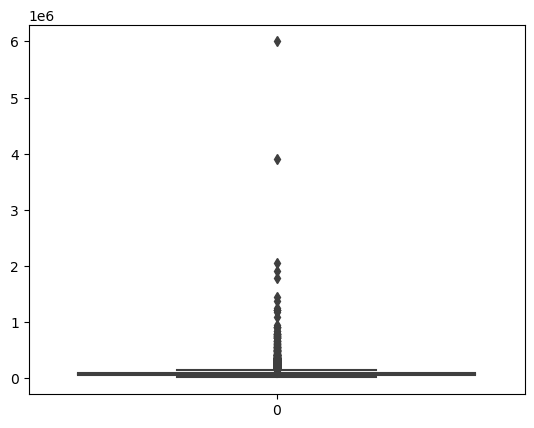

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(loan_df['annual_inc'])

#### The above boxplot indicates the presence of outliers.There is a huge increase after the 95th percentile so removing them.

In [51]:
quantile_annual_inc = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_annual_inc

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [52]:
quantile_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= quantile_95_annual_inc]

<Axes: >

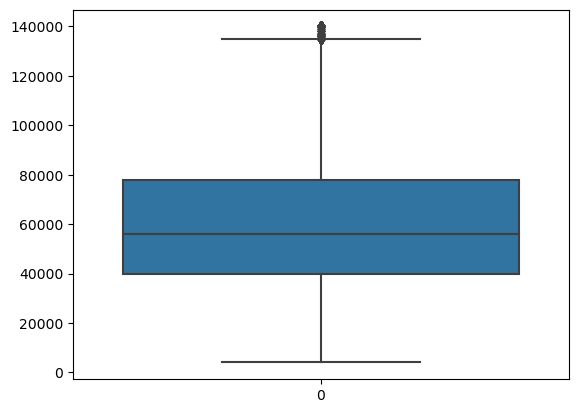

In [53]:

sns.boxplot(loan_df.annual_inc)

<Axes: >

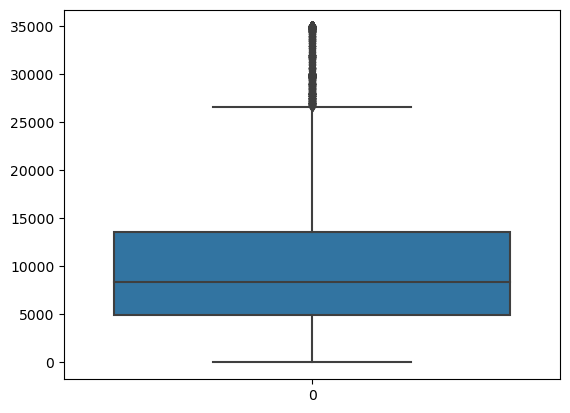

In [54]:
sns.boxplot(loan_df.funded_amnt_inv)

In [55]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.98, 0.99, 1.0])

0.50     8375.000000
0.75    13623.731415
0.90    19750.000000
0.95    23941.875589
0.97    24975.000000
0.98    27950.000000
0.99    31954.028576
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

#### Though there are some values far from distribution, it is almost continous and there is no need to remove outlier values for funded_amnt_inv.

<Axes: >

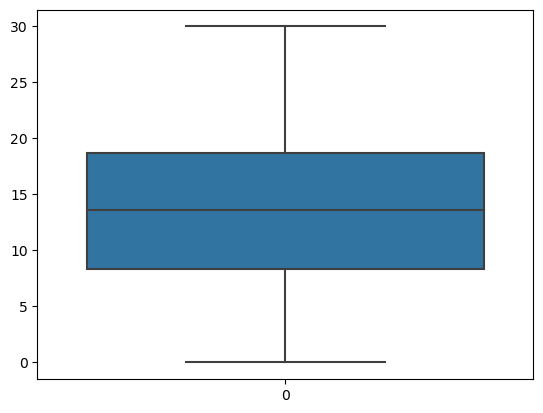

In [56]:
sns.boxplot(loan_df['dti'])

#### No outliers found for dti.

## Univariate Analysis

### Check Loan Status 

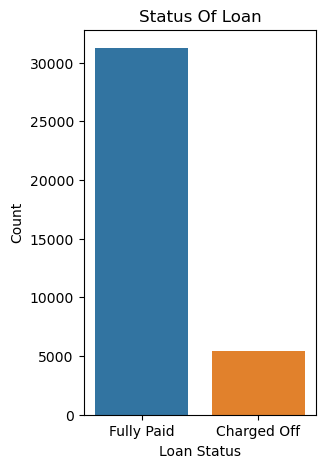

In [57]:


plt.figure(figsize=(3,5))
ax=sns.countplot(x = 'loan_status', data = loan_df)
ax.set_title('Status Of Loan')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()


### Pie plot to visualize Term duration

<Axes: title={'center': 'Term duration in months'}, ylabel='count'>

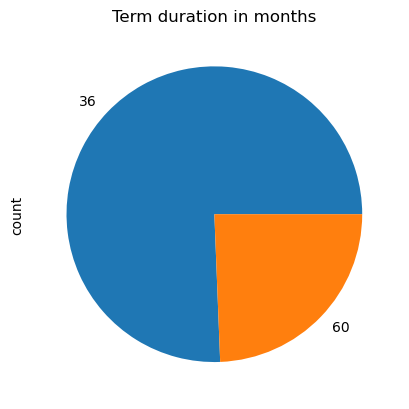

In [58]:

loan_df["term"].value_counts().plot(kind="pie", title = 'Term duration in months')

### Distribution of interest rate

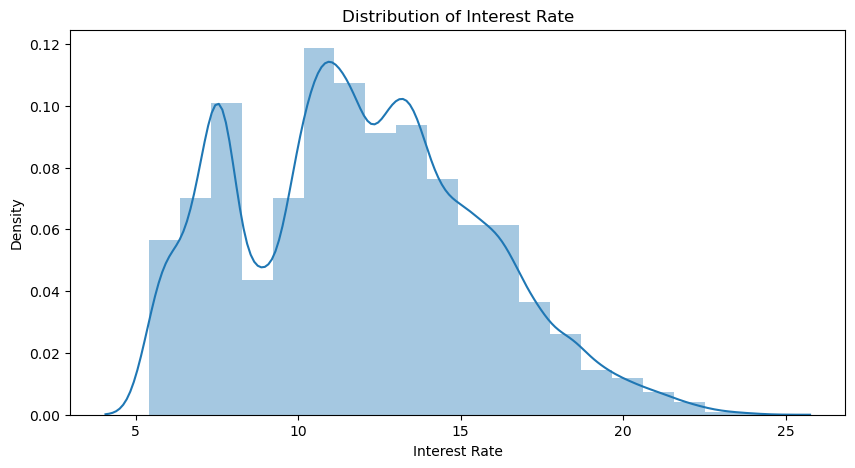

In [59]:

plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

### Distribution of Grade

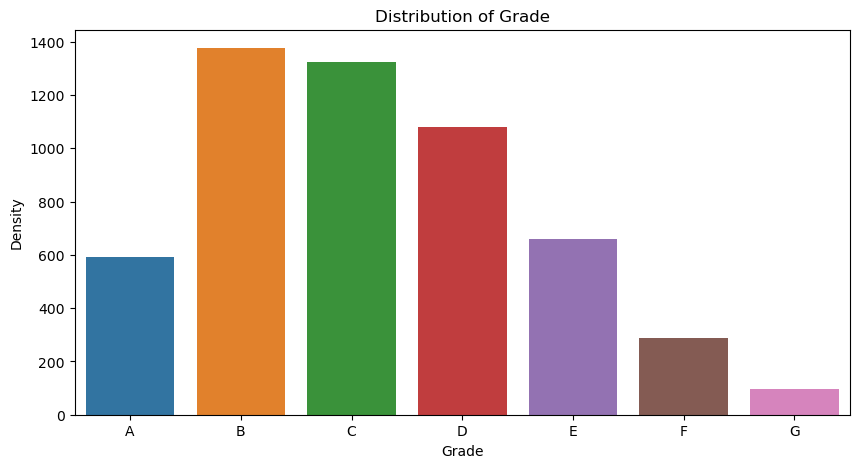

In [60]:

plt.figure(figsize=(10,5))
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

### Distribution of home_ownership

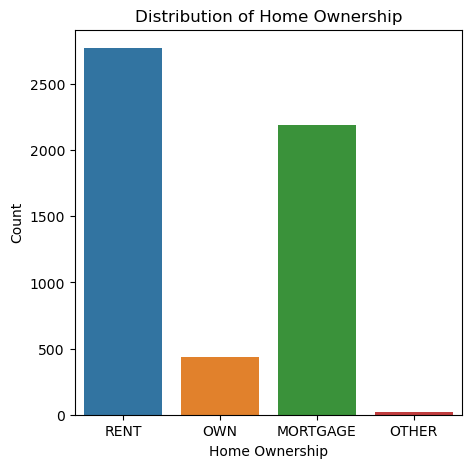

In [61]:

plt.figure(figsize=(5,5))
sns.countplot(x = 'home_ownership', data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

### Distribution of verification_status

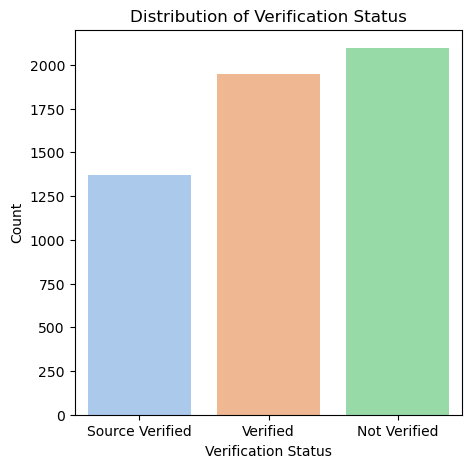

In [62]:

plt.figure(figsize=(5,5))
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'], palette="pastel")
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

### Distribution of annual_inc

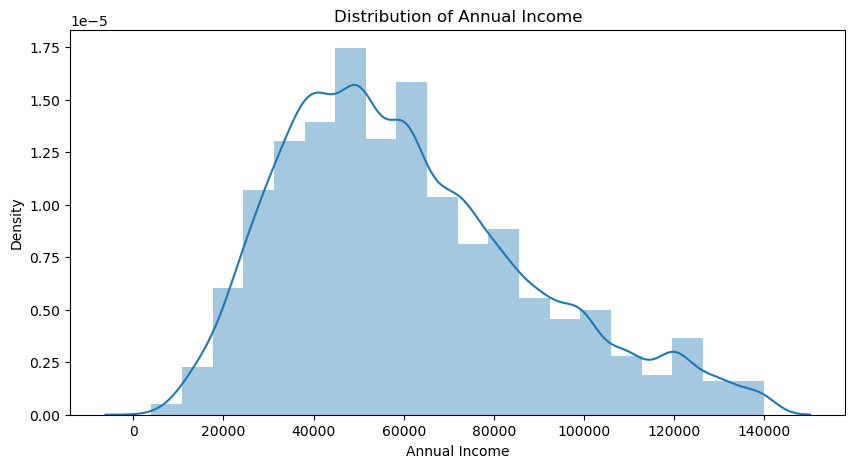

In [63]:

plt.figure(figsize=(10,5))
sns.distplot(loan_df.annual_inc,kde=True,bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

### Distribution of purpose

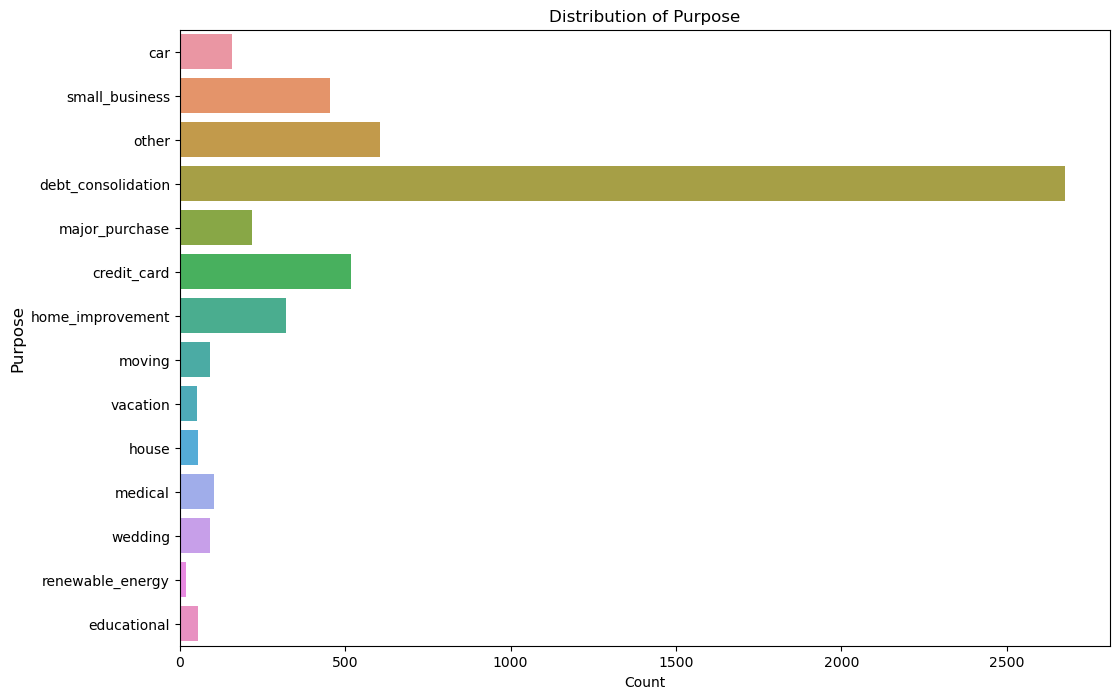

In [64]:

plt.figure(figsize=(12,8))
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Count')
plt.ylabel('Purpose',fontsize=12)
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

### Distribution of pub_rec_bankruptcies

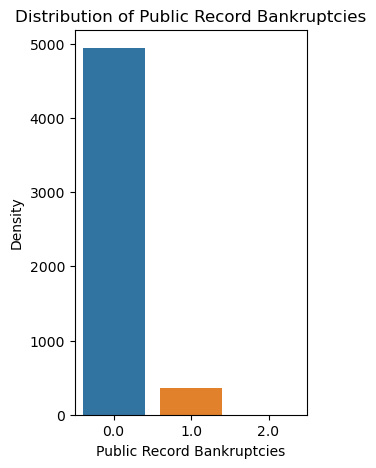

In [65]:

plt.figure(figsize=(3,5))
sns.countplot(x='pub_rec_bankruptcies', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

### Distribution of emp_length

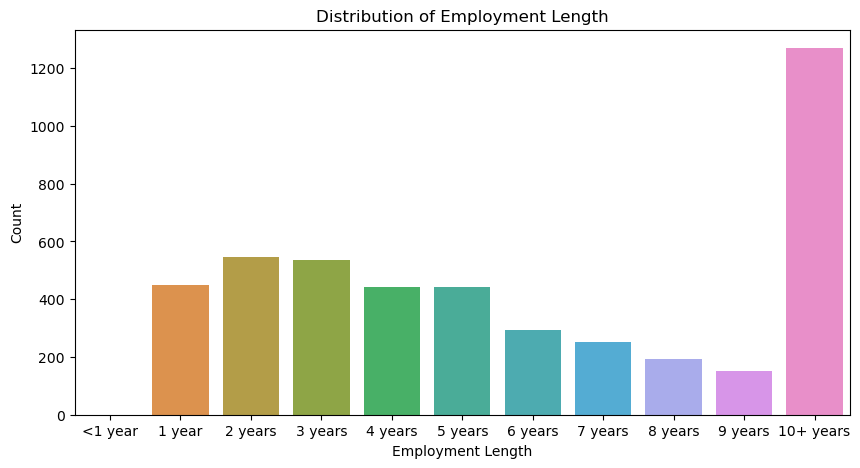

In [66]:

plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan_df[loan_df['loan_status']=='Charged Off'], order = ['<1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

### Distribution of issue_month

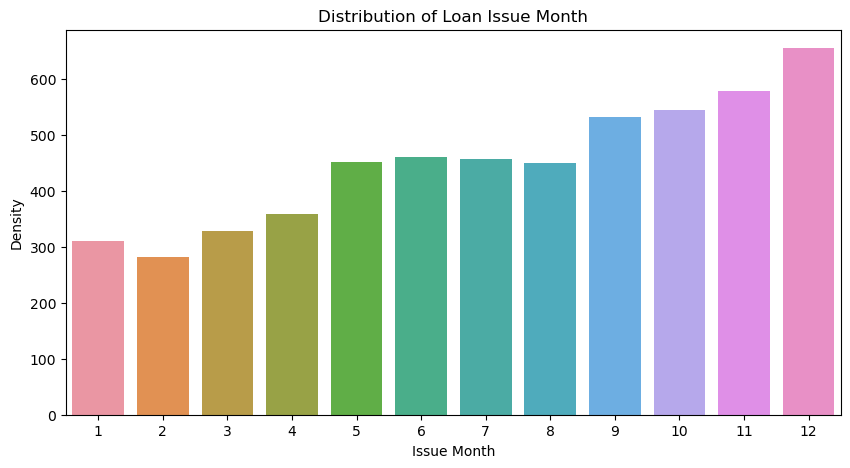

In [67]:

plt.figure(figsize=(10,5))
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

### Distribution of issue_year

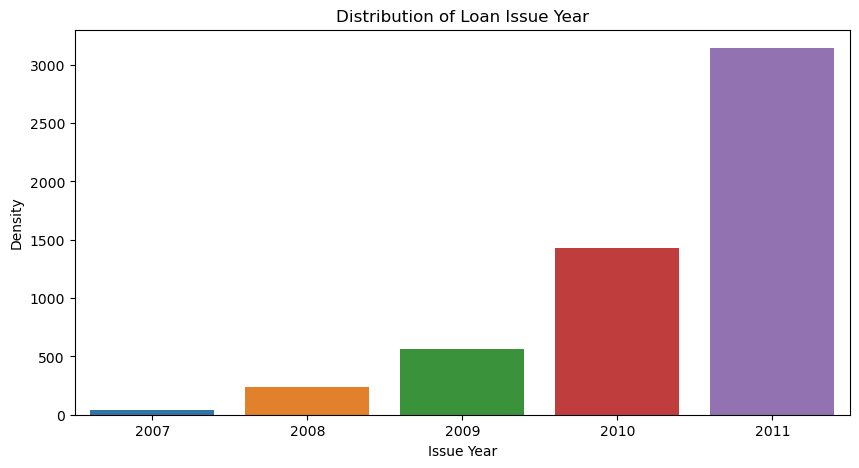

In [68]:

plt.figure(figsize=(10,5))
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

## Segmented Univariate Analysis

### Distribution of funded_amnt_inv based on loan_status

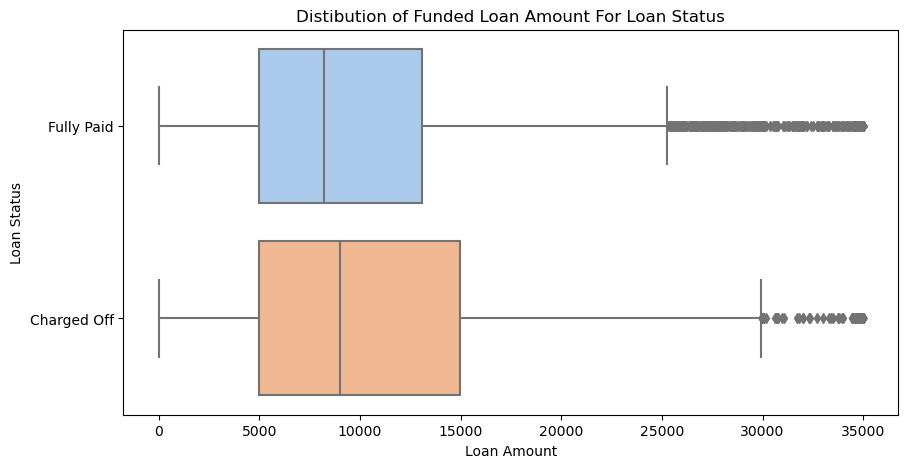

In [69]:

plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='funded_amnt_inv',y='loan_status', palette="pastel")
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Funded Loan Amount For Loan Status',fontsize=12)
plt.show()

### Distribution of annual_inc based on loan_status

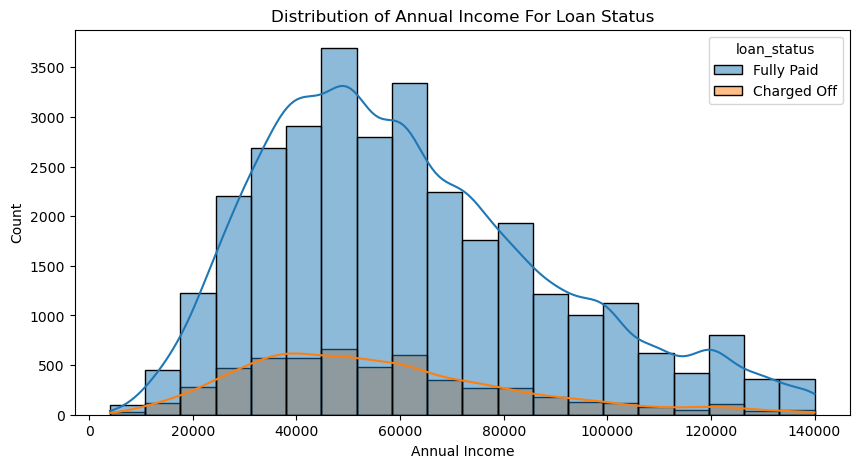

In [70]:

plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

### Distribution of int_amnt based on loan_status

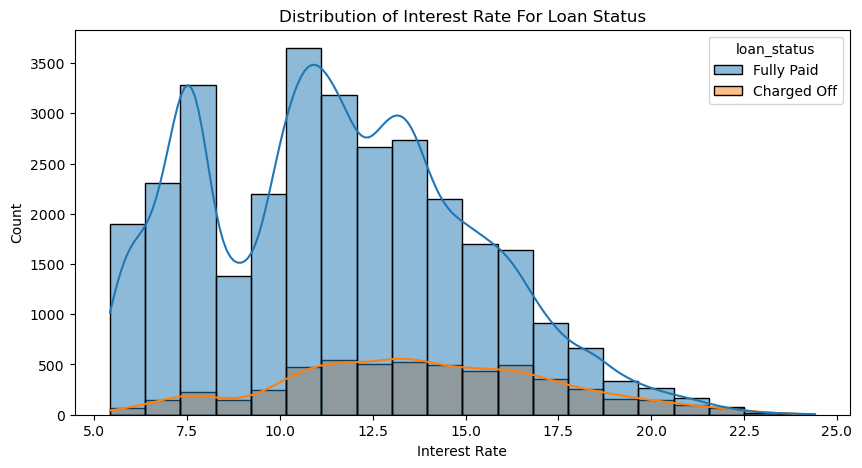

In [71]:

plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

## Bivariate Analysis

### Comparison of interest rate based on grade

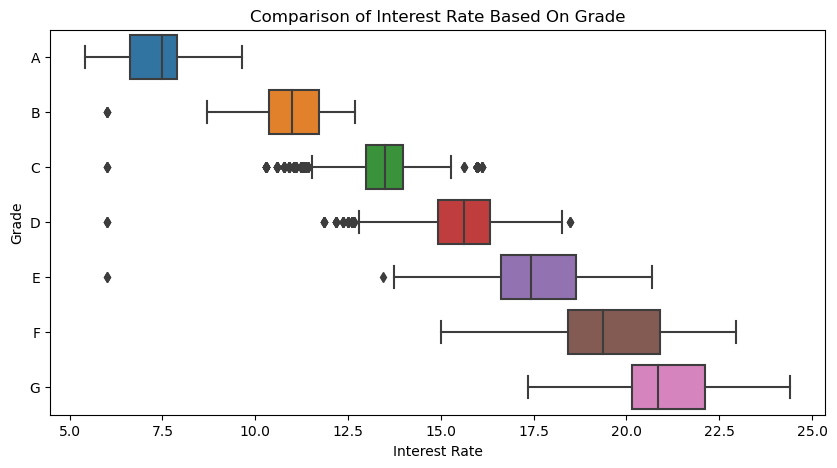

In [72]:

plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

### Comparison of DTI over grade for loan status

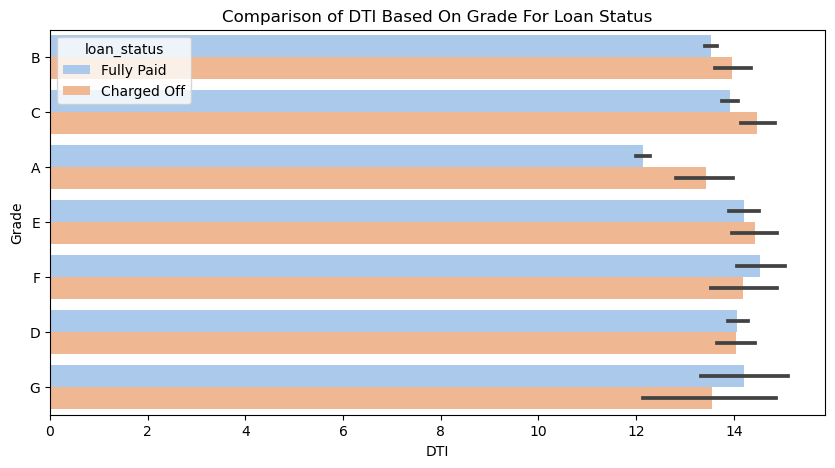

In [73]:

plt.figure(figsize=(10,5))
sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status', palette="pastel")
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

### Comparison of Annual Income over Grade for loan status


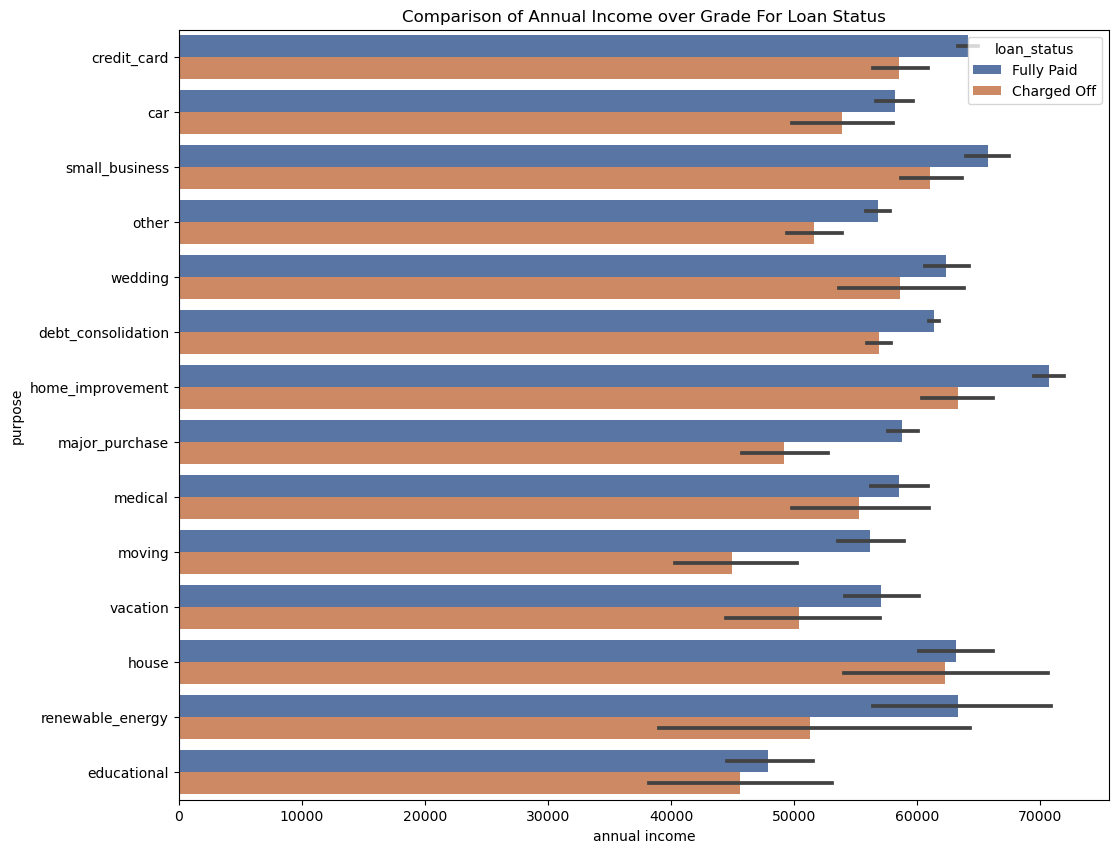

In [76]:
plt.figure(figsize=(12,10))
sns.barplot(data=loan_df,x='annual_inc', y='purpose',hue='loan_status', palette="deep")
plt.xlabel('annual income')
plt.ylabel('purpose')
plt.title('Comparison of Annual Income over Grade For Loan Status',fontsize=12)
plt.show()

### Comparison of Annual Income over home_ownership For Loan Statu

In [79]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

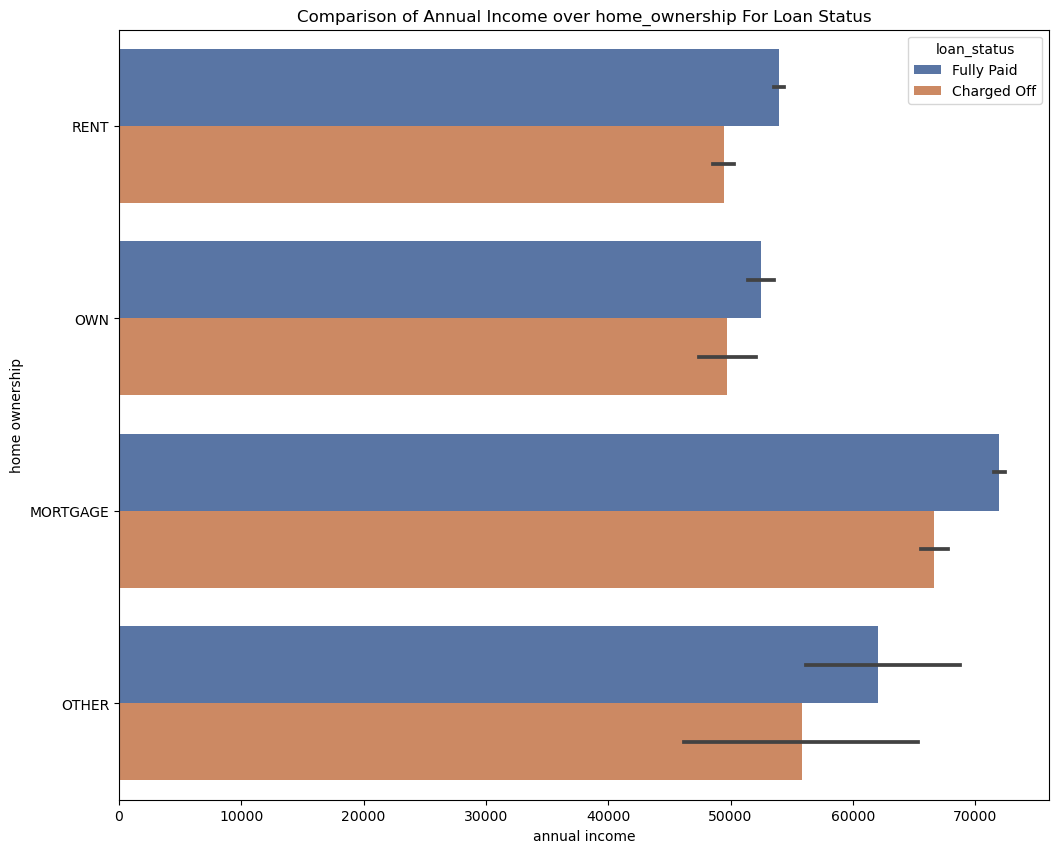

In [80]:
plt.figure(figsize=(12,10))
sns.barplot(data=loan_df,x='annual_inc', y='home_ownership',hue='loan_status', palette="deep")
plt.xlabel('annual income')
plt.ylabel('home ownership')
plt.title('Comparison of Annual Income over home_ownership For Loan Status',fontsize=12)
plt.show()

### Comparison of Interest Rate Based On Loan Amount

In [100]:
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


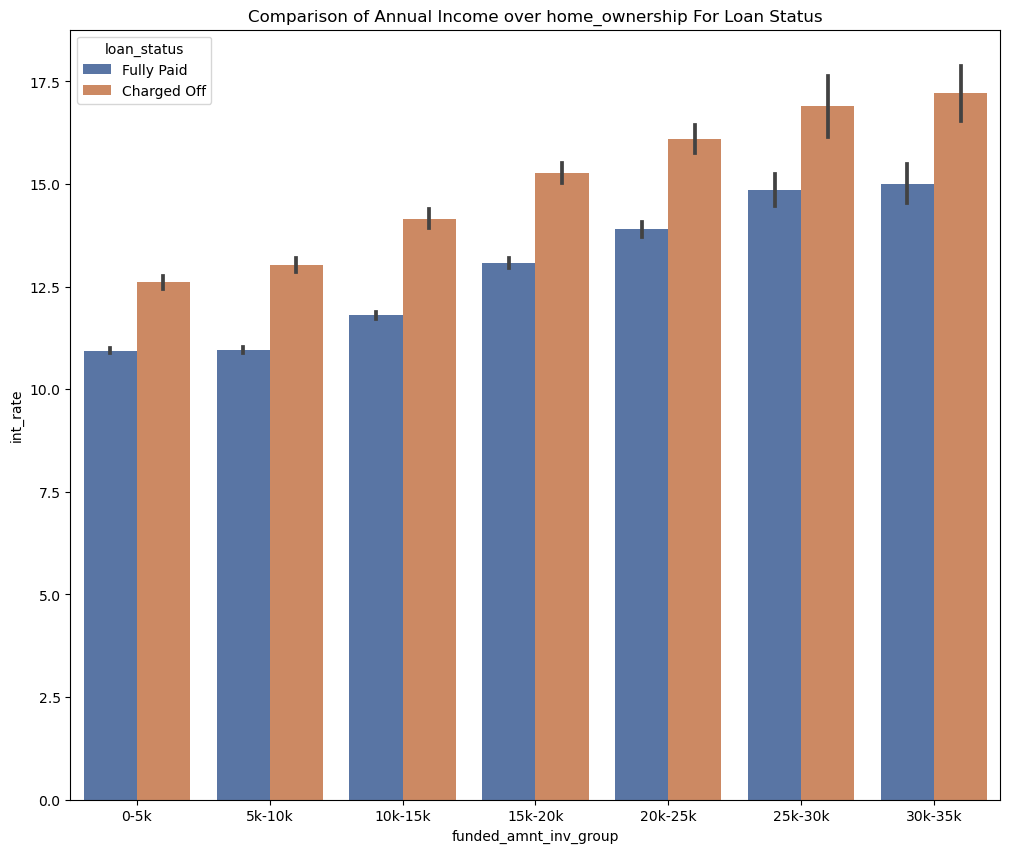

In [101]:
plt.figure(figsize=(12,10))
sns.barplot(data=loan_df,x='funded_amnt_inv_group', y='int_rate',hue='loan_status', palette="deep")
plt.xlabel('funded_amnt_inv_group')
plt.ylabel('int_rate')
plt.title('Comparison of Annual Income over home_ownership For Loan Status',fontsize=12)
plt.show()